## Classification

- In this chapter we use MNIST dataset for hand written digit recognition,
    - this dataset is directly available in sklearn lib , so we can use it directly.
    - A DESCR key is describing dataset.
    - A data key contains array with one row per instance and one column per feature.
    - A target key containing an array with labels.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print('X shape: ',X.shape)
print('y shape: ',y.shape)

X shape:  (70000, 784)
y shape:  (70000,)


- There are 70,000 images and each image has 784 features. as each image is 28*28 pixels
    - each feature ( or pixel) represents its intensity rangr from 0(white) to 255(black).
   

val:  5


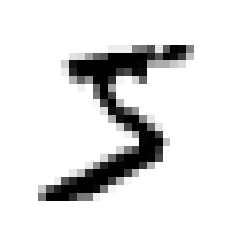

In [3]:
# plotting one row
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X.iloc[0].values
digit_val = y[0]
some_digit_image = some_digit.reshape(28,28)
print('val: ',digit_val)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
import numpy as np
# y values are string '5' or '6' , need to convert it to integer
y = y.astype(np.uint8)

In [5]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

- training set is already shuffled by sklearn ( can verify if its performing good in cross-validation folds)

#### Confusion Matrix
- preferred way to determine performance of a classifier.
    - cross_val_predict(), returns the output or prediction values for each folds. where as cross_val_Score() returns the accuracy ro score.
    -  the prection values from cross_val_predict use it to generate confusion_matrix . from sklearn.metrics
- precision = TP/(TP+FP)
    - TP true positives, FP false positives
- Recall,  sensitivity or true positive rate (TPR) : ratio of positive instances that are correctly detected by this classifier. TP/(TP+FN)

`from sklearn.metrics import precision_score, recall_score`
- finally f1 score, combined score of precision and recall.
    - its a harmonic mean of precision and recall.
    - regular mean treats all values equally , harmonic mean gives much more weight to low values . so f1 score will be high if both recall and precision are high.
    - `from sklearn.metrics import f1_score`
    - f1_score(y_test,y_pred)
    
    
The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other con‐ texts you really care about recall. For example, if you trained a classifier to detect vid‐ eos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a clas‐ sifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the clas‐ sifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

- Precision /Recall tradeoff (Read more)
- ROC Curve ( receiver operating characteristic )
- ROc AUC Curve (AUC- area under the curve )

In [11]:
## cretae a model and predict

### To-do

- Build a spam classifier (a more challenging exercise):
    - Download examples of spam and ham from Apache SpamAssassin’s public datasets.
    - Unzip the datasets and familiarize yourself with the data format.
    - Split the datasets into a training set and a test set.
    - Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector indicating the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
    - You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).
    - Then try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.